# Customer Segmentation using RFM Analysis and Unsupervised Learning

# Introduction
In this project, we will use RFM (Recency, Frequency, Monetary) analysis to segment customers based on their transaction history. RFM analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. It helps businesses identify and target their best customers. We will also use unsupervised learning techniques such as KMeans and Gaussian Mixture Models to cluster customers based on their RFM features.

The dataset is from an airline company and contains information about customers' flight transactions. The goal is to segment customers based on their recency, frequency, and monetary value and identify the most valuable customer segments.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sns

In [2]:
flight_train = pd.read_csv('sa-customer-segmentation/flight_train.csv')
flight_test = pd.read_csv('sa-customer-segmentation/flight_test.csv')



# Exploratory Data Analysis - EDA

Let's start by exploring the dataset to understand its structure and contents. We will check the first few rows, data types, and missing values in the dataset. We will also handle any missing values and clean the data as needed.

In [3]:
flight_train.head(10)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
6,44924,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,CN,46.0,3/31/2014,...,114469.0,287042,3/31/2014,1,7.190000,28,20,0.965347,298873,29
7,22631,4/9/2010,4/9/2010,Female,6,wenzhoushi,zhejiang,CN,50.0,3/31/2014,...,114971.0,287230,3/29/2014,3,10.111111,45,7,0.962070,351198,14
8,32197,6/7/2011,7/1/2011,Male,5,DRANCY,NaN,FR,50.0,3/31/2014,...,87401.0,321489,3/26/2014,6,13.054545,94,5,0.828478,295158,7
9,31645,7/5/2010,7/5/2010,Female,6,wenzhou,zhejiang,CN,43.0,3/31/2014,...,60267.0,375074,3/17/2014,15,11.333333,73,13,0.708010,251907,16


In [121]:
# list each column and its data type
flight_train.dtypes


MEMBER_NO                      object
FFP_DATE               datetime64[ns]
FIRST_FLIGHT_DATE      datetime64[ns]
GENDER                         object
FFP_TIER                       object
WORK_CITY                      object
WORK_PROVINCE                  object
WORK_COUNTRY                   object
AGE                            object
LOAD_TIME              datetime64[ns]
FLIGHT_COUNT                    int64
BP_SUM                         object
SUM_YR_1                       object
SUM_YR_2                       object
SEG_KM_SUM                      int64
LAST_FLIGHT_DATE               object
LAST_TO_END                     int64
AVG_INTERVAL                   object
MAX_INTERVAL                   object
EXCHANGE_COUNT                 object
avg_discount                  float64
Points_Sum                     object
Point_NotFlight                object
recency                       float64
frequency                     float64
monetary                      float64
membership_d

In [4]:
# count NaN values in each column
flight_train.isnull().sum()


MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            1966
WORK_PROVINCE        2784
WORK_COUNTRY           20
AGE                   342
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              262
SUM_YR_2               63
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [5]:
# print the values with missing country
flight_train[flight_train['WORK_COUNTRY'].isnull()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
2226,45041,7/26/2007,11/14/2007,Male,4,NaN,NaN,NaN,49.0,3/31/2014,...,13741.0,61442,3/13/2014,19,15.377778,95,1,0.817299,44113,1
4563,18124,3/31/2006,7/24/2011,Male,4,NaN,NaN,NaN,66.0,3/31/2014,...,31996.0,29440,3/28/2014,4,26.900000,188,0,1.218094,36630,0
8282,35987,3/31/2006,8/4/2006,Male,4,NaN,NaN,NaN,52.0,3/31/2014,...,11497.0,16952,7/7/2013,269,51.500000,200,0,1.473311,24843,1
13502,20244,4/6/2005,6/17/2005,Male,4,NaN,NaN,NaN,47.0,3/31/2014,...,672.0,18837,3/5/2014,27,63.363636,349,1,0.924350,30934,37
16058,20268,4/23/2005,7/19/2005,Male,4,NaN,NaN,NaN,49.0,3/31/2014,...,10850.0,24242,3/26/2014,6,40.166667,157,1,0.620168,9392,1
16615,14,2/13/2009,10/20/2009,Male,4,NaN,NaN,NaN,47.0,3/31/2014,...,0.0,10992,1/9/2013,448,23.083333,146,0,1.328539,13725,0
18385,27098,8/20/2006,10/10/2006,Male,4,NaN,NaN,NaN,NaN,3/31/2014,...,1380.0,16658,5/19/2013,318,18.227273,74,0,0.800600,12965,0
18715,29192,4/10/2005,4/11/2005,Male,4,NaN,NaN,NaN,46.0,3/31/2014,...,5383.0,24182,2014/2/29 0:00:00,32,40.687500,104,0,0.540859,10229,0
19774,1,3/31/2006,1/13/2007,Male,4,NaN,NaN,NaN,40.0,3/31/2014,...,7200.0,18770,9/16/2013,198,4.000000,7,0,0.658303,7035,0
22787,27081,2/13/2009,8/8/2009,Male,4,NaN,NaN,NaN,53.0,3/31/2014,...,2473.0,24137,2/20/2014,41,42.750000,144,0,0.441860,5101,1


# Data Cleaning

We will start by handling missing values in the dataset. We will drop rows with missing values in the 'WORK_COUNTRY' column and fill missing values in other columns with appropriate values. We will also transform the data to lowercase and handle any inconsistencies in the data. Finally, we will perform RFM analysis to calculate the recency, frequency, and monetary features for each customer.

In [6]:
# drop the rows with missing country
flight_train = flight_train.dropna(subset=['WORK_COUNTRY'])

flight_test = flight_test.dropna(subset=['WORK_COUNTRY'])



In [7]:
# assign missing values on work city based on the country with format unknown_$country
flight_train['WORK_CITY'] = flight_train['WORK_CITY'].fillna('unknown_city_' + flight_train['WORK_COUNTRY'])
flight_test['WORK_CITY'] = flight_test['WORK_CITY'].fillna('unknown_city_' + flight_test['WORK_COUNTRY'])

# assign missing values on work province based on the country with format unknown_province_$country
flight_train['WORK_PROVINCE'] = flight_train['WORK_PROVINCE'].fillna('unknown_province_' + flight_train['WORK_COUNTRY'])
flight_test['WORK_PROVINCE'] = flight_test['WORK_PROVINCE'].fillna('unknown_province_' + flight_test['WORK_COUNTRY'])

# assign missing age with the mean of the age
flight_train['AGE'] = flight_train['AGE'].fillna(flight_train['AGE'].mean())
flight_test['AGE'] = flight_test['AGE'].fillna(flight_test['AGE'].mean())

# assign missing gender with most frequent gender
flight_train['GENDER'] = flight_train['GENDER'].fillna(flight_train['GENDER'].mode()[0])
flight_test['GENDER'] = flight_test['GENDER'].fillna(flight_test['GENDER'].mode()[0])


In [8]:
# check if there are still missing values
flight_train.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 0
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             262
SUM_YR_2              63
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [9]:
flight_train.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,unknown_city_CN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
6,44924,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,CN,46.0,3/31/2014,...,114469.0,287042,3/31/2014,1,7.190000,28,20,0.965347,298873,29
7,22631,4/9/2010,4/9/2010,Female,6,wenzhoushi,zhejiang,CN,50.0,3/31/2014,...,114971.0,287230,3/29/2014,3,10.111111,45,7,0.962070,351198,14
8,32197,6/7/2011,7/1/2011,Male,5,DRANCY,unknown_province_FR,FR,50.0,3/31/2014,...,87401.0,321489,3/26/2014,6,13.054545,94,5,0.828478,295158,7
9,31645,7/5/2010,7/5/2010,Female,6,wenzhou,zhejiang,CN,43.0,3/31/2014,...,60267.0,375074,3/17/2014,15,11.333333,73,13,0.708010,251907,16


In [10]:
flight_train['WORK_CITY'] = flight_train.apply(
    lambda row: 'unknown_city_' + row['WORK_COUNTRY'] if row['WORK_CITY'] == '.' else row['WORK_CITY'],
    axis=1
)
flight_test['WORK_CITY'] = flight_test.apply(
    lambda row: 'unknown_city_' + row['WORK_COUNTRY'] if row['WORK_CITY'] == '.' else row['WORK_CITY'],
    axis=1
)

flight_train['WORK_PROVINCE'] = flight_train.apply(
    lambda row: 'unknown_province_' + row['WORK_COUNTRY'] if row['WORK_PROVINCE'] == '.' else row['WORK_PROVINCE'],
    axis=1
)
flight_test['WORK_PROVINCE'] = flight_test.apply(
    lambda row: 'unknown_province_' + row['WORK_COUNTRY'] if row['WORK_PROVINCE'] == '.' else row['WORK_PROVINCE'],
    axis=1
)


In [11]:
flight_train.head(10)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,unknown_city_CN,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,unknown_city_CN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,unknown_city_CN,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
6,44924,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,CN,46.0,3/31/2014,...,114469.0,287042,3/31/2014,1,7.190000,28,20,0.965347,298873,29
7,22631,4/9/2010,4/9/2010,Female,6,wenzhoushi,zhejiang,CN,50.0,3/31/2014,...,114971.0,287230,3/29/2014,3,10.111111,45,7,0.962070,351198,14
8,32197,6/7/2011,7/1/2011,Male,5,DRANCY,unknown_province_FR,FR,50.0,3/31/2014,...,87401.0,321489,3/26/2014,6,13.054545,94,5,0.828478,295158,7
9,31645,7/5/2010,7/5/2010,Female,6,wenzhou,zhejiang,CN,43.0,3/31/2014,...,60267.0,375074,3/17/2014,15,11.333333,73,13,0.708010,251907,16


In [12]:
# set the whole dataset to lowercase
flight_train = flight_train.apply(lambda x: x.astype(str).str.lower())
flight_test = flight_test.apply(lambda x: x.astype(str).str.lower())

In [13]:
flight_train.head(10)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,male,6,unknown_city_cn,beijing,cn,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483253589,18,34,0.961639043,619760,50
1,28065,2/19/2007,8/3/2007,male,6,unknown_city_cn,beijing,cn,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194244604,17,29,1.25231444,415768,33
2,55106,2/1/2007,8/30/2007,male,6,unknown_city_cn,beijing,cn,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507463,18,20,1.254675516,406361,26
3,21189,8/22/2008,8/23/2008,male,5,los angeles,ca,us,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.86363636,73,11,1.090869565,372204,12
4,39546,4/10/2009,4/15/2009,male,6,guiyang,guizhou,cn,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.78807947,47,27,0.970657895,338813,39
5,56972,2/10/2008,9/29/2009,male,6,guangzhou,guangdong,cn,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956044,52,10,0.967692483,343121,15
6,44924,3/22/2006,3/29/2006,male,6,wulumuqishi,xinjiang,cn,46.0,3/31/2014,...,114469.0,287042,3/31/2014,1,7.19,28,20,0.965346535,298873,29
7,22631,4/9/2010,4/9/2010,female,6,wenzhoushi,zhejiang,cn,50.0,3/31/2014,...,114971.0,287230,3/29/2014,3,10.11111111,45,7,0.962070222,351198,14
8,32197,6/7/2011,7/1/2011,male,5,drancy,unknown_province_fr,fr,50.0,3/31/2014,...,87401.0,321489,3/26/2014,6,13.05454545,94,5,0.828478237,295158,7
9,31645,7/5/2010,7/5/2010,female,6,wenzhou,zhejiang,cn,43.0,3/31/2014,...,60267.0,375074,3/17/2014,15,11.33333333,73,13,0.708010153,251907,16


In [14]:
# look for any dot in the dataset on any column
flight_train[flight_train.apply(lambda x: x.str.contains('\.', regex=False)).any(axis=1)]


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/37/nxcxdncj76zfvv3tz3hxrx080000gn/T/ipykernel_84137/1729833667.py:2: SyntaxWarning: invalid escape sequence '\.'
  flight_train[flight_train.apply(lambda x: x.str.contains('\.', regex=False)).any(axis=1)]


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [15]:
# remove SUM_YR_1 and SUM_YR_2 with missing values
flight_train = flight_train[flight_train['SUM_YR_1'].notnull()]
flight_train = flight_train[flight_train['SUM_YR_2'].notnull()]

flight_test = flight_test[flight_test['SUM_YR_1'].notnull()]
flight_test = flight_test[flight_test['SUM_YR_2'].notnull()]


In [16]:
flight_train.describe()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,54980,54980,54980,54980,54980,54980,54980,54980,54980,54980,...,54980,54980,54980,54980,54980,54980,54980,54980,54980,54980
unique,54980,3067,3395,2,3,2847,1009,110,84,1,...,16668,28090,729,729,10616,691,28,50040,24399,99
top,54993,1/13/2011,9/9/2005,male,4,guangzhou,guangdong,cn,47.0,3/31/2014,...,0.0,3934,3/31/2014,1,3.0,3,0,1.0,2671,0
freq,1,140,76,42488,50104,8353,15397,50413,2456,54980,...,8324,211,929,929,366,399,46398,479,75,35983


# Data Preprocessing

We will preprocess the data by transforming the data types of the columns, handling missing values, and calculating the RFM features for each customer. We will also calculate the membership duration and discount rate for each customer. Finally, we will use unsupervised learning techniques to cluster customers based on their RFM features.

In [17]:
# RFM Analysis
# Recency, Frequency, Monetary
# Recency: How recently a customer has made a purchase
# Frequency: How often a customer makes a purchase
# Monetary: How much money a customer spends on purchases

# Transform the data type of LAST_FLIGHT_DATE to datetime, some data are in different format than 02/29/2016
flight_train['LAST_FLIGHT_DATE'] = pd.to_datetime(flight_train['LAST_FLIGHT_DATE'], errors='coerce', format='mixed')
flight_test['LAST_FLIGHT_DATE'] = pd.to_datetime(flight_test['LAST_FLIGHT_DATE'], errors='coerce', format='mixed')

# Transform the data type of FIRST_FLIGHT_DATE to datetime, some data are in different format than 02/29/2016
flight_train['FIRST_FLIGHT_DATE'] = pd.to_datetime(flight_train['FIRST_FLIGHT_DATE'], errors='coerce', format='mixed')
flight_test['FIRST_FLIGHT_DATE'] = pd.to_datetime(flight_test['FIRST_FLIGHT_DATE'], errors='coerce', format='mixed')

# Transform FFP_DATE to datetime format
flight_train['FFP_DATE'] = pd.to_datetime(flight_train['FFP_DATE'], errors='coerce', format='mixed')
flight_test['FFP_DATE'] = pd.to_datetime(flight_test['FFP_DATE'], errors='coerce', format='mixed')

# Transform LOAD_TIME to datetime format
flight_train['LOAD_TIME'] = pd.to_datetime(flight_train['LOAD_TIME'], errors='coerce', format='mixed')
flight_test['LOAD_TIME'] = pd.to_datetime(flight_test['LOAD_TIME'], errors='coerce', format='mixed')



In [18]:
flight_train.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,male,6,unknown_city_cn,beijing,cn,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483253589,18,34,0.961639043,619760,50
1,28065,2007-02-19,2007-08-03,male,6,unknown_city_cn,beijing,cn,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194244604,17,29,1.25231444,415768,33
2,55106,2007-02-01,2007-08-30,male,6,unknown_city_cn,beijing,cn,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507463,18,20,1.254675516,406361,26
3,21189,2008-08-22,2008-08-23,male,5,los angeles,ca,us,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.86363636,73,11,1.090869565,372204,12
4,39546,2009-04-10,2009-04-15,male,6,guiyang,guizhou,cn,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.78807947,47,27,0.970657895,338813,39
5,56972,2008-02-10,2009-09-29,male,6,guangzhou,guangdong,cn,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956044,52,10,0.967692483,343121,15
6,44924,2006-03-22,2006-03-29,male,6,wulumuqishi,xinjiang,cn,46.0,2014-03-31,...,114469.0,287042,2014-03-31,1,7.19,28,20,0.965346535,298873,29
7,22631,2010-04-09,2010-04-09,female,6,wenzhoushi,zhejiang,cn,50.0,2014-03-31,...,114971.0,287230,2014-03-29,3,10.11111111,45,7,0.962070222,351198,14
8,32197,2011-06-07,2011-07-01,male,5,drancy,unknown_province_fr,fr,50.0,2014-03-31,...,87401.0,321489,2014-03-26,6,13.05454545,94,5,0.828478237,295158,7
9,31645,2010-07-05,2010-07-05,female,6,wenzhou,zhejiang,cn,43.0,2014-03-31,...,60267.0,375074,2014-03-17,15,11.33333333,73,13,0.708010153,251907,16


In [19]:
# Check for Non numerical values on LAST_TO_END and FLIGHT_COUNT
flight_train[~flight_train['LAST_TO_END'].str.isnumeric()] 


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [20]:
# Check for Non numerical values on FLIGHT_COUNT and avg_discount
flight_train[~flight_train['FLIGHT_COUNT'].str.isnumeric()]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [21]:
import pandas as pd


# Calculate recency as the difference in days
flight_train['recency'] = (flight_train['LOAD_TIME'] - flight_train['LAST_FLIGHT_DATE']).dt.days
flight_test['recency'] = (flight_test['LOAD_TIME'] - flight_test['LAST_FLIGHT_DATE']).dt.days

# Convert numerical columns to appropriate types
flight_train['LAST_TO_END'] = pd.to_numeric(flight_train['LAST_TO_END'], errors='coerce')
flight_test['LAST_TO_END'] = pd.to_numeric(flight_test['LAST_TO_END'], errors='coerce')

flight_train['FLIGHT_COUNT'] = pd.to_numeric(flight_train['FLIGHT_COUNT'], errors='coerce')
flight_test['FLIGHT_COUNT'] = pd.to_numeric(flight_test['FLIGHT_COUNT'], errors='coerce')


# Handle potential division by zero and calculate frequency
# Adjust formula as necessary based on your understanding of the business logic
flight_train['frequency'] = flight_train.apply(
    lambda x: (x['LAST_TO_END'] - x['FLIGHT_COUNT']) / (x['FLIGHT_COUNT'] - 1) if x['FLIGHT_COUNT'] > 1 else 0,
    axis=1
)
flight_test['frequency'] = flight_test.apply(
    lambda x: (x['LAST_TO_END'] - x['FLIGHT_COUNT']) / (x['FLIGHT_COUNT'] - 1) if x['FLIGHT_COUNT'] > 1 else 0,
    axis=1
)

# Ensure monetary calculation columns are numeric
flight_train['SEG_KM_SUM'] = pd.to_numeric(flight_train['SEG_KM_SUM'], errors='coerce')
flight_test['SEG_KM_SUM'] = pd.to_numeric(flight_test['SEG_KM_SUM'], errors='coerce')

flight_train['avg_discount'] = pd.to_numeric(flight_train['avg_discount'], errors='coerce')
flight_test['avg_discount'] = pd.to_numeric(flight_test['avg_discount'], errors='coerce')

# Calculate monetary
flight_train['monetary'] = flight_train['SEG_KM_SUM'] / flight_train['avg_discount']
flight_test['monetary'] = flight_test['SEG_KM_SUM'] / flight_test['avg_discount']

# Replace any potential infinities or NaNs that result from division by zero
flight_train.replace([float('inf'), -float('inf'), pd.NA], 0, inplace=True)
flight_test.replace([float('inf'), -float('inf'), pd.NA], 0, inplace=True)





In [22]:
flight_train.head(10)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,recency,frequency,monetary
0,54993,2006-11-02,2008-12-24,male,6,unknown_city_cn,beijing,cn,31.0,2014-03-31,...,1,3.483253589,18,34,0.961639,619760,50,0.0,-1.000000,603882.511039
1,28065,2007-02-19,2007-08-03,male,6,unknown_city_cn,beijing,cn,42.0,2014-03-31,...,7,5.194244604,17,29,1.252314,415768,33,6.0,-0.956835,234508.195881
2,55106,2007-02-01,2007-08-30,male,6,unknown_city_cn,beijing,cn,40.0,2014-03-31,...,11,5.298507463,18,20,1.254676,406361,26,10.0,-0.925373,226123.803631
3,21189,2008-08-22,2008-08-23,male,5,los angeles,ca,us,64.0,2014-03-31,...,97,27.86363636,73,11,1.090870,372204,12,95.0,3.363636,257900.677612
4,39546,2009-04-10,2009-04-15,male,6,guiyang,guizhou,cn,48.0,2014-03-31,...,5,4.78807947,47,27,0.970658,338813,39,4.0,-0.973510,319296.841448
5,56972,2008-02-10,2009-09-29,male,6,guangzhou,guangdong,cn,64.0,2014-03-31,...,79,7.043956044,52,10,0.967692,343121,15,77.0,-0.142857,304420.056139
6,44924,2006-03-22,2006-03-29,male,6,wulumuqishi,xinjiang,cn,46.0,2014-03-31,...,1,7.19,28,20,0.965347,298873,29,0.0,-1.000000,297346.071688
7,22631,2010-04-09,2010-04-09,female,6,wenzhoushi,zhejiang,cn,50.0,2014-03-31,...,3,10.11111111,45,7,0.962070,351198,14,2.0,-0.972222,298554.090369
8,32197,2011-06-07,2011-07-01,male,5,drancy,unknown_province_fr,fr,50.0,2014-03-31,...,6,13.05454545,94,5,0.828478,295158,7,5.0,-0.909091,388047.610236
9,31645,2010-07-05,2010-07-05,female,6,wenzhou,zhejiang,cn,43.0,2014-03-31,...,15,11.33333333,73,13,0.708010,251907,16,14.0,-0.777778,529757.939785


In [23]:
# How long the customer has been a member of the loyalty program
flight_train['membership_duration'] = (flight_train['LOAD_TIME'] - flight_train['FFP_DATE']).dt.days
flight_test['membership_duration'] = (flight_test['LOAD_TIME'] - flight_test['FFP_DATE']).dt.days

# Discount rate for each customer
flight_train['discount_rate'] = 1 - flight_train['avg_discount']
flight_test['discount_rate'] = 1 - flight_test['avg_discount']


In [24]:
flight_train.head(10)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,recency,frequency,monetary,membership_duration,discount_rate
0,54993,2006-11-02,2008-12-24,male,6,unknown_city_cn,beijing,cn,31.0,2014-03-31,...,18,34,0.961639,619760,50,0.0,-1.000000,603882.511039,2706,0.038361
1,28065,2007-02-19,2007-08-03,male,6,unknown_city_cn,beijing,cn,42.0,2014-03-31,...,17,29,1.252314,415768,33,6.0,-0.956835,234508.195881,2597,-0.252314
2,55106,2007-02-01,2007-08-30,male,6,unknown_city_cn,beijing,cn,40.0,2014-03-31,...,18,20,1.254676,406361,26,10.0,-0.925373,226123.803631,2615,-0.254676
3,21189,2008-08-22,2008-08-23,male,5,los angeles,ca,us,64.0,2014-03-31,...,73,11,1.090870,372204,12,95.0,3.363636,257900.677612,2047,-0.090870
4,39546,2009-04-10,2009-04-15,male,6,guiyang,guizhou,cn,48.0,2014-03-31,...,47,27,0.970658,338813,39,4.0,-0.973510,319296.841448,1816,0.029342
5,56972,2008-02-10,2009-09-29,male,6,guangzhou,guangdong,cn,64.0,2014-03-31,...,52,10,0.967692,343121,15,77.0,-0.142857,304420.056139,2241,0.032308
6,44924,2006-03-22,2006-03-29,male,6,wulumuqishi,xinjiang,cn,46.0,2014-03-31,...,28,20,0.965347,298873,29,0.0,-1.000000,297346.071688,2931,0.034653
7,22631,2010-04-09,2010-04-09,female,6,wenzhoushi,zhejiang,cn,50.0,2014-03-31,...,45,7,0.962070,351198,14,2.0,-0.972222,298554.090369,1452,0.037930
8,32197,2011-06-07,2011-07-01,male,5,drancy,unknown_province_fr,fr,50.0,2014-03-31,...,94,5,0.828478,295158,7,5.0,-0.909091,388047.610236,1028,0.171522
9,31645,2010-07-05,2010-07-05,female,6,wenzhou,zhejiang,cn,43.0,2014-03-31,...,73,13,0.708010,251907,16,14.0,-0.777778,529757.939785,1365,0.291990


# Histograms for RFM features

We will plot histograms for the RFM features to visualize the distribution of data points. This will help us understand the range and spread of the recency, frequency, and monetary features in the dataset.

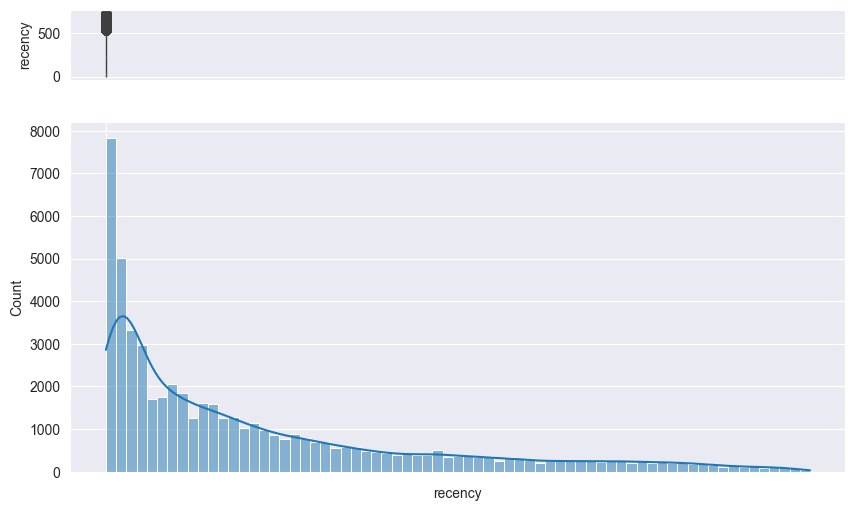

In [25]:
import seaborn as sns
# Show boxplot and displot for RFM
fig,  (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))

sns.boxplot(flight_train['recency'], ax=ax_box)
sns.histplot(flight_train['recency'], ax=ax_hist, kde=True)

plt.show()



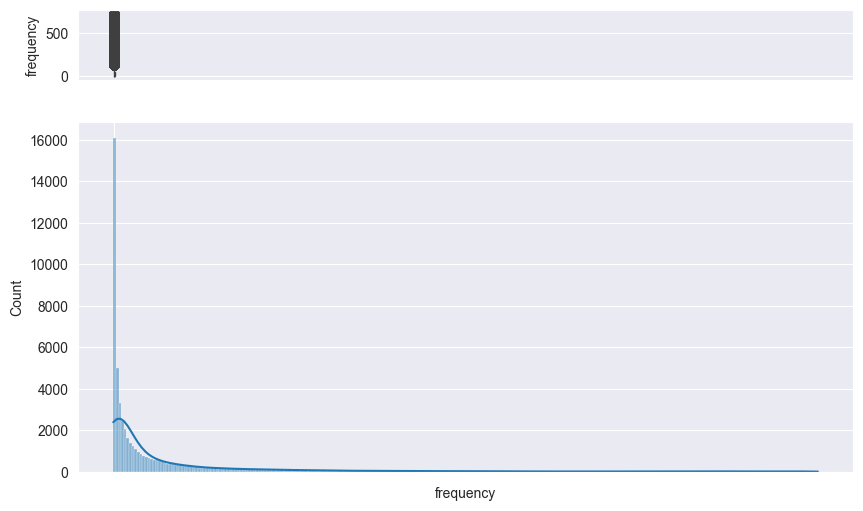

In [26]:
fig,  (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))

sns.boxplot(flight_train['frequency'], ax=ax_box)
sns.histplot(flight_train['frequency'], ax=ax_hist, kde=True)
plt.show()


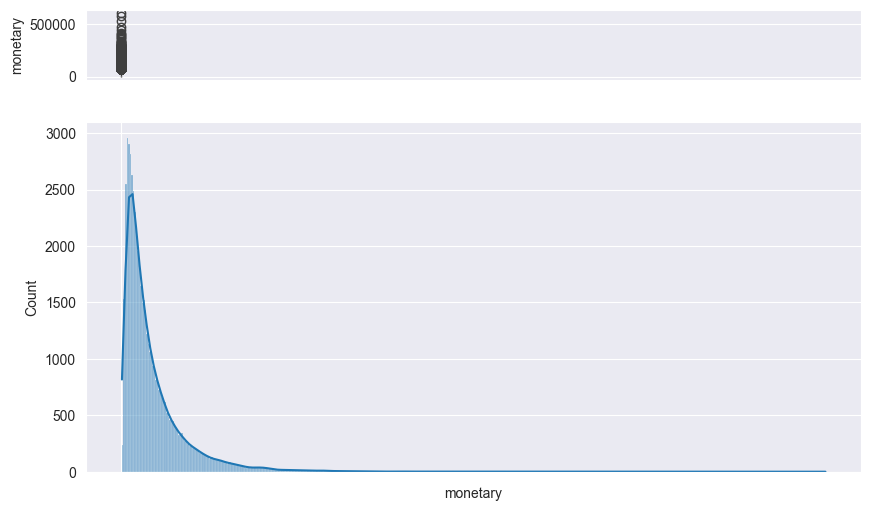

In [27]:
fig,  (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))

sns.boxplot(flight_train['monetary'], ax=ax_box)
sns.histplot(flight_train['monetary'], ax=ax_hist, kde=True)
plt.show()

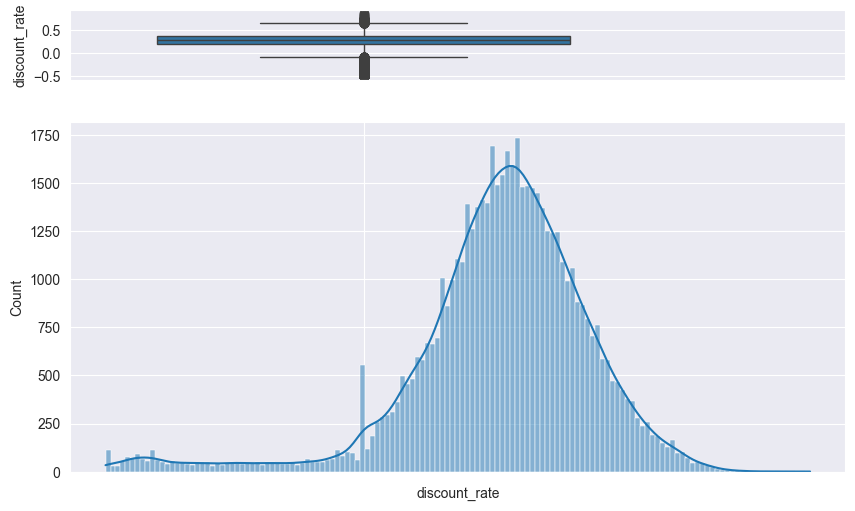

In [28]:
fig,  (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))

sns.boxplot(flight_train['discount_rate'], ax=ax_box)
sns.histplot(flight_train['discount_rate'], ax=ax_hist, kde=True)
plt.show()

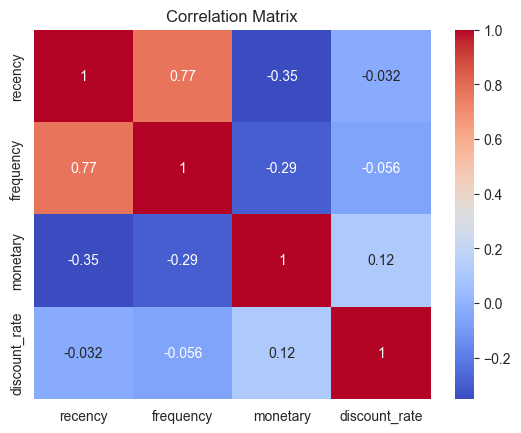

In [107]:
# show correlation between features
correlation = flight_train[['recency', 'frequency', 'monetary', 'discount_rate']].corr()

# Plot the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/var/folders/37/nxcxdncj76zfvv3tz3hxrx080000gn/T/ipykernel_84137/4140456548.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


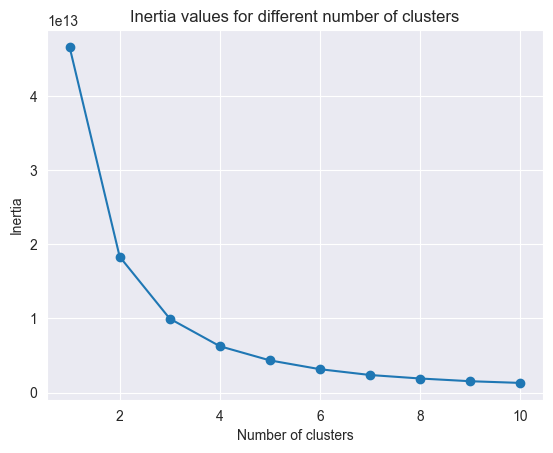

In [29]:
# elbow method to determine the number of clusters
from sklearn.cluster import KMeans

# Select the features to cluster
X = flight_train[['recency', 'frequency', 'monetary', 'discount_rate']]

# Ensure that NaN values are handled
X.fillna(0, inplace=True)

# Create a list to store the inertia values
inertia = []

# Create a range of K values to test
k_values = range(1, 11)

# Fit the KMeans model and calculate the inertia
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)
    
# Plot the inertia values
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia values for different number of clusters')
plt.show()


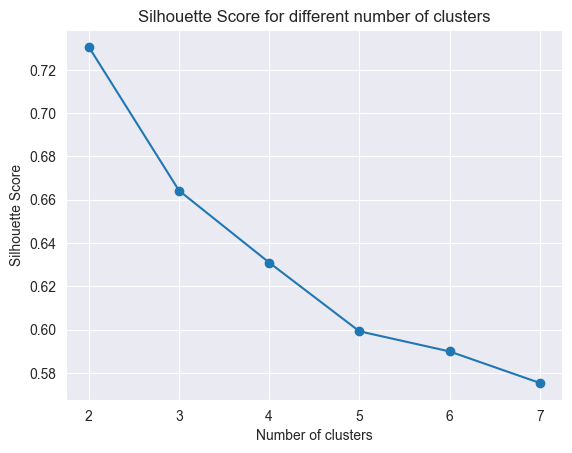

In [30]:
# silhouette score to determine the number of clusters for 2, 3, and 4 clusters

from sklearn.metrics import silhouette_score

# Create a list to store the silhouette scores
silhouette_scores = []

# Create a range of K values to test
k_values = range(2, 8)

# Fit the KMeans model and calculate the silhouette score
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')
plt.show()


## Elbow Method and Silhouette Score

Based on the elbow method and silhouette score, we can see that the optimal number of clusters is 2. We will use KMeans with 2 clusters to segment the customers based on their RFM features. Silouette score is a measure of how similar an object is to its own cluster compared to other clusters. 

The silhouette scores are higher for 2 clusters compared to 3 or 4 clusters, indicating that 2 clusters are the optimal choice for this dataset.

# Using KMeans for clustering

/var/folders/37/nxcxdncj76zfvv3tz3hxrx080000gn/T/ipykernel_84137/602419686.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


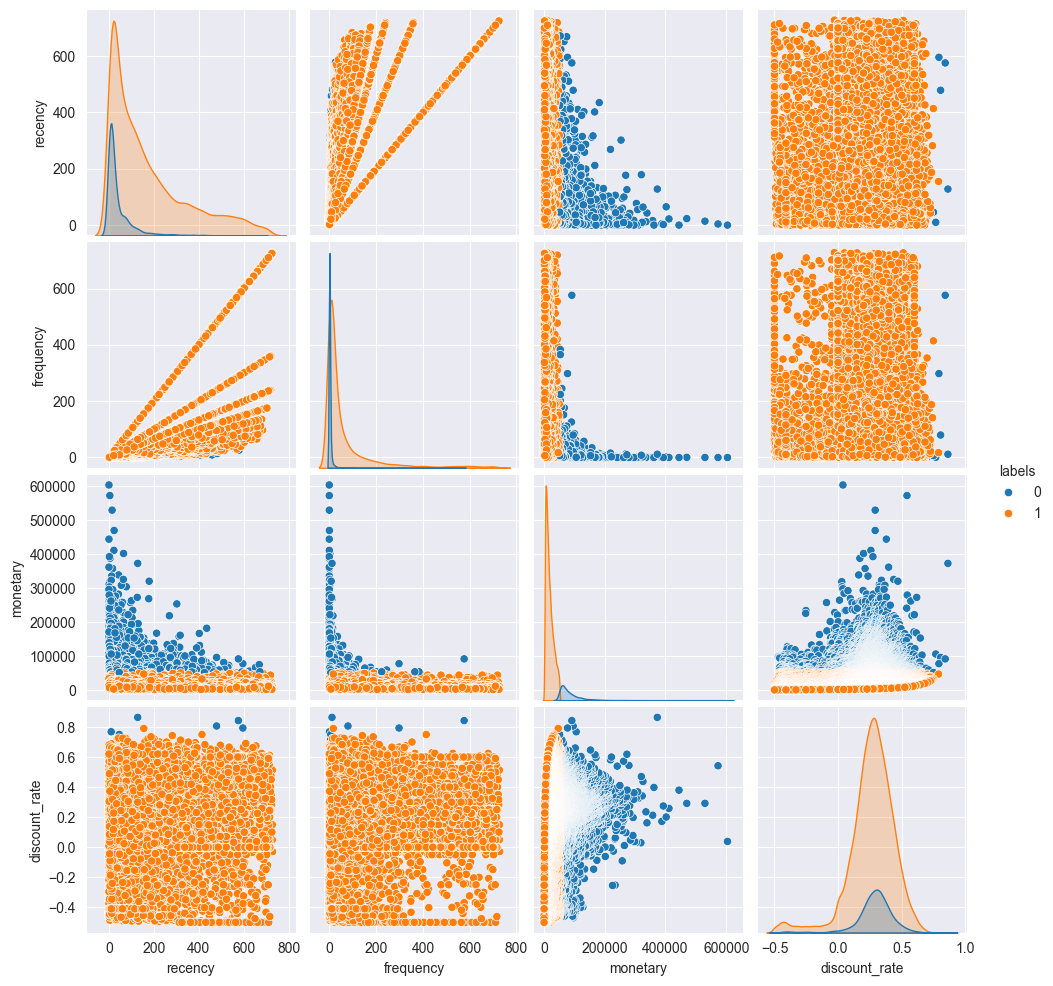

In [118]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Select the features to cluster
X = flight_train[['recency', 'frequency', 'monetary', 'discount_rate']]
X.fillna(0, inplace=True)

# Fit the KMeans model
model = KMeans(n_clusters=2, random_state=42)
flight_train['labels'] = model.fit_predict(X)  # Adding labels directly to the DataFrame

# plair plot for the clusters
sns.pairplot(data=flight_train, hue='labels', vars=['recency', 'frequency', 'monetary', 'discount_rate'])
plt.show()


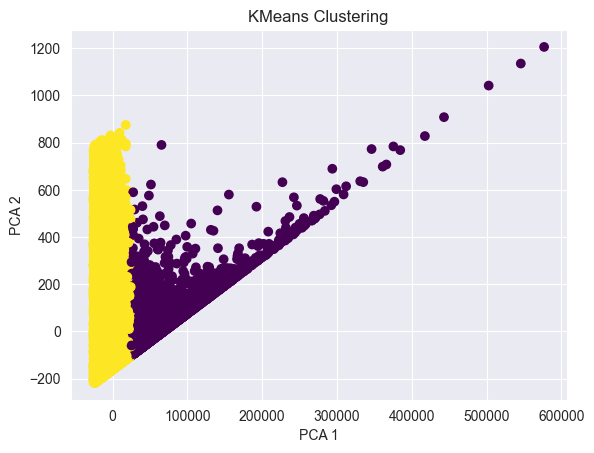

In [92]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Fit the KMeans model
model = KMeans(n_clusters=2, random_state=42)
flight_train['labels'] = model.fit_predict(X)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=flight_train['labels'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('KMeans Clustering')
plt.show()




# Cluster Analysis

The KMeans model identified two customer segments based on the RFM features: Loyal Customers and Casual Customers. Loyal Customers make more frequent purchases and generate more revenue on average than Casual Customers. The pairplot shows the distribution of data points in the two clusters based on the PCA components. The clusters are well-separated, indicating that the KMeans model was able to effectively segment the customers based on their transaction history.

In [95]:
# First, we examine the centroids
centroids = model.cluster_centers_

# Create a DataFrame for the centroids to visualize them better
centroid_df = pd.DataFrame(centroids, columns=['recency', 'frequency', 'monetary', 'discount_rate'])

# Now, we profile each cluster by looking at the centroids
# and the distribution of data points in the pairplot
cluster_labels = {
    0: 'Loyal Customers',
    1: 'Causal Customers',
}

# Assign these labels to each data point
flight_train['cluster_label'] = flight_train['labels'].apply(lambda x: cluster_labels[x])



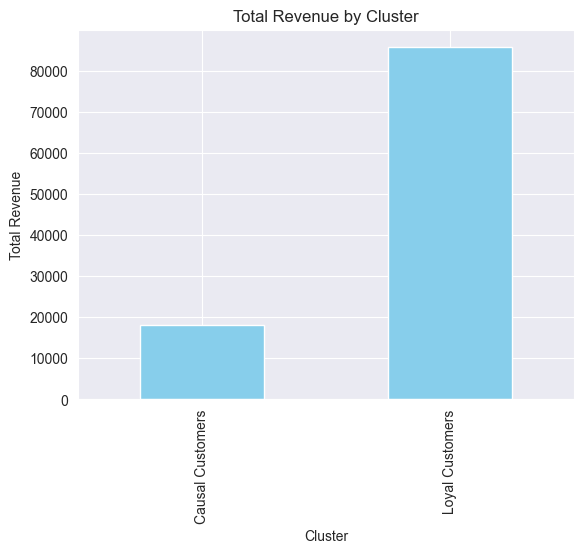

In [96]:
# which cluster generated the most revenue
# Calculate the total revenue for each cluster
cluster_revenue = flight_train.groupby('cluster_label')['monetary'].mean()

# Plot the total revenue for each cluster
cluster_revenue.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Cluster')
plt.show()



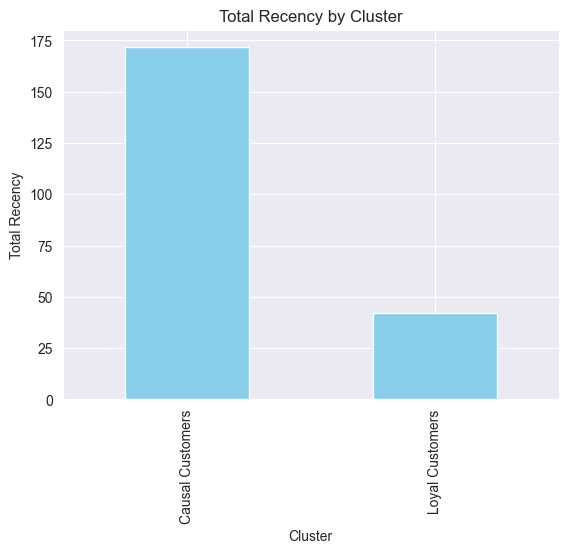

In [98]:
# which cluster has the most recent customers
# Calculate the total recency for each cluster
cluster_recency = flight_train.groupby('cluster_label')['recency'].mean()

# Plot the total recency for each cluster
cluster_recency.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Recency')
plt.title('Total Recency by Cluster')
plt.show()


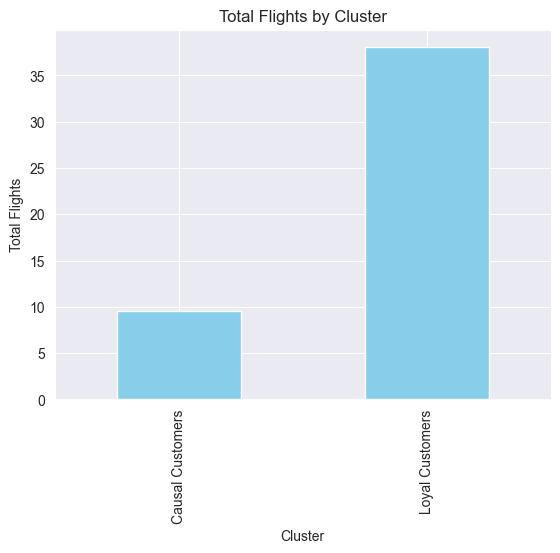

In [99]:
# number of flights for each cluster
# Calculate the total recency for each cluster
cluster_flights = flight_train.groupby('cluster_label')['FLIGHT_COUNT'].mean()

# Plot the total recency for each cluster
cluster_flights.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Flights')
plt.title('Total Flights by Cluster')
plt.show()


In [100]:
# count the number of customers in each cluster
flight_train['cluster_label'].value_counts()



cluster_label
Causal Customers    47839
Loyal Customers      7141
Name: count, dtype: int64

In [101]:
flight_train.head(20)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,avg_discount,Points_Sum,Point_NotFlight,recency,frequency,monetary,membership_duration,discount_rate,labels,cluster_label
0,54993,2006-11-02,2008-12-24,male,6,unknown_city_cn,beijing,cn,31.0,2014-03-31,...,0.961639,619760,50,0.0,-1.000000,603882.511039,2706,0.038361,0,Loyal Customers
1,28065,2007-02-19,2007-08-03,male,6,unknown_city_cn,beijing,cn,42.0,2014-03-31,...,1.252314,415768,33,6.0,-0.956835,234508.195881,2597,-0.252314,0,Loyal Customers
2,55106,2007-02-01,2007-08-30,male,6,unknown_city_cn,beijing,cn,40.0,2014-03-31,...,1.254676,406361,26,10.0,-0.925373,226123.803631,2615,-0.254676,0,Loyal Customers
3,21189,2008-08-22,2008-08-23,male,5,los angeles,ca,us,64.0,2014-03-31,...,1.090870,372204,12,95.0,3.363636,257900.677612,2047,-0.090870,0,Loyal Customers
4,39546,2009-04-10,2009-04-15,male,6,guiyang,guizhou,cn,48.0,2014-03-31,...,0.970658,338813,39,4.0,-0.973510,319296.841448,1816,0.029342,0,Loyal Customers
5,56972,2008-02-10,2009-09-29,male,6,guangzhou,guangdong,cn,64.0,2014-03-31,...,0.967692,343121,15,77.0,-0.142857,304420.056139,2241,0.032308,0,Loyal Customers
6,44924,2006-03-22,2006-03-29,male,6,wulumuqishi,xinjiang,cn,46.0,2014-03-31,...,0.965347,298873,29,0.0,-1.000000,297346.071688,2931,0.034653,0,Loyal Customers
7,22631,2010-04-09,2010-04-09,female,6,wenzhoushi,zhejiang,cn,50.0,2014-03-31,...,0.962070,351198,14,2.0,-0.972222,298554.090369,1452,0.037930,0,Loyal Customers
8,32197,2011-06-07,2011-07-01,male,5,drancy,unknown_province_fr,fr,50.0,2014-03-31,...,0.828478,295158,7,5.0,-0.909091,388047.610236,1028,0.171522,0,Loyal Customers
9,31645,2010-07-05,2010-07-05,female,6,wenzhou,zhejiang,cn,43.0,2014-03-31,...,0.708010,251907,16,14.0,-0.777778,529757.939785,1365,0.291990,0,Loyal Customers


In [102]:
# predict with test data


X_test = flight_test[['recency', 'frequency', 'monetary', 'discount_rate']]
X_test.fillna(0, inplace=True)

# Predict the clusters for the test data
flight_test['labels'] = model.predict(X_test)

# Assign the cluster labels
flight_test['cluster_label'] = flight_test['labels'].apply(lambda x: cluster_labels[x])


/var/folders/37/nxcxdncj76zfvv3tz3hxrx080000gn/T/ipykernel_84137/291081399.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


In [103]:
flight_test.head(500)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,avg_discount,Points_Sum,Point_NotFlight,recency,frequency,monetary,membership_duration,discount_rate,labels,cluster_label
0,27355,2011-09-19,2012-06-02,male,4,nanjing,jiangsu,cn,29.0,2014-03-31,...,1.000000,2879,6,547.0,547.000000,2005.000000,924,0.000000,1,Causal Customers
1,4032,2012-09-18,2012-09-18,female,4,changchunshi,jilinsheng,cn,43.0,2014-03-31,...,0.871291,1731,0,55.0,27.000000,2640.909499,559,0.128709,1,Causal Customers
2,12913,2009-03-18,2009-03-18,male,4,beijing,beijing,cn,31.0,2014-03-31,...,0.836358,1626,0,383.0,191.000000,2865.997757,1839,0.163642,1,Causal Customers
3,58465,2012-09-06,2012-10-03,male,4,shantou,guangdong,cn,30.0,2014-03-31,...,0.702924,1786,0,286.0,94.666667,4057.336112,571,0.297076,1,Causal Customers
4,45414,2012-06-13,2012-09-06,male,4,guangzhou,guangdong,cn,40.0,2014-03-31,...,0.530725,3639,22,34.0,16.500000,7116.674073,656,0.469275,1,Causal Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,48590,2008-08-15,2008-08-15,female,4,beijing,beijing,cn,33.0,2014-03-31,...,0.745000,1830,0,31.0,9.666667,3484.563758,2054,0.255000,1,Causal Customers
496,25389,2012-12-21,2013-08-31,male,4,shanghai,shanghai,cn,52.0,2014-03-31,...,0.720566,1682,0,153.0,153.000000,3724.847983,465,0.279434,1,Causal Customers
497,19115,2006-12-28,2007-01-14,male,4,shantoushi,guangdongsheng,cn,36.0,2014-03-31,...,0.754251,1912,0,25.0,7.333333,3399.398108,2650,0.245749,1,Causal Customers
498,26912,2008-02-28,2008-02-28,male,4,daqing,heilongjiang,cn,53.0,2014-03-31,...,0.835000,1700,0,198.0,65.333333,2773.652695,2223,0.165000,1,Causal Customers


In [104]:
flight_test['cluster_label'].value_counts()


cluster_label
Causal Customers    7982
Name: count, dtype: int64

In [105]:
# show loyal customers
flight_test[flight_test['cluster_label'] == 'Loyal Customers']


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,avg_discount,Points_Sum,Point_NotFlight,recency,frequency,monetary,membership_duration,discount_rate,labels,cluster_label


# Use Gaussian Mixture Models (GMM) for clustering

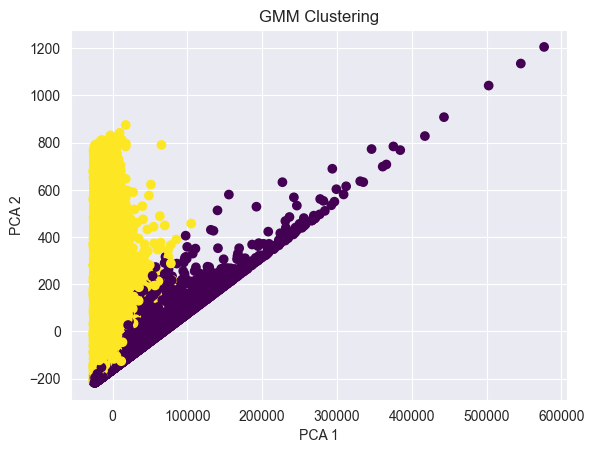

In [112]:
# Try GMM for clustering
from sklearn.mixture import GaussianMixture

# Fit the GMM model
gmm = GaussianMixture(n_components=2, random_state=42)
flight_train['labels'] = gmm.fit_predict(X)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=flight_train['labels'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('GMM Clustering')
plt.show()


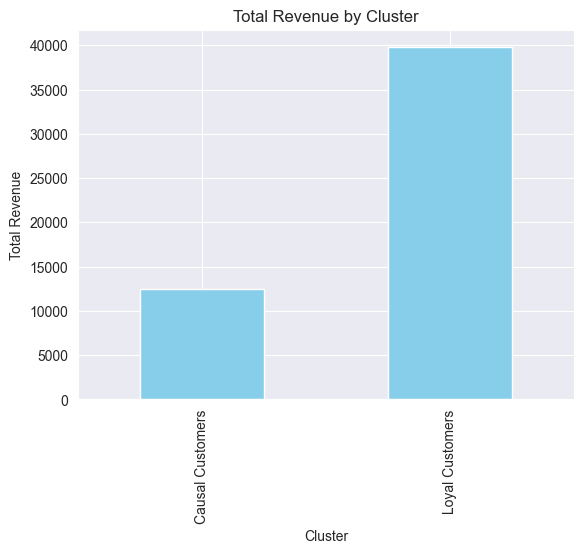

In [113]:
# Assign these labels to each data point
flight_train['cluster_label'] = flight_train['labels'].apply(lambda x: cluster_labels[x])

# Calculate the total revenue for each cluster
cluster_revenue = flight_train.groupby('cluster_label')['monetary'].mean()

# Plot the total revenue for each cluster
cluster_revenue.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Cluster')
plt.show()


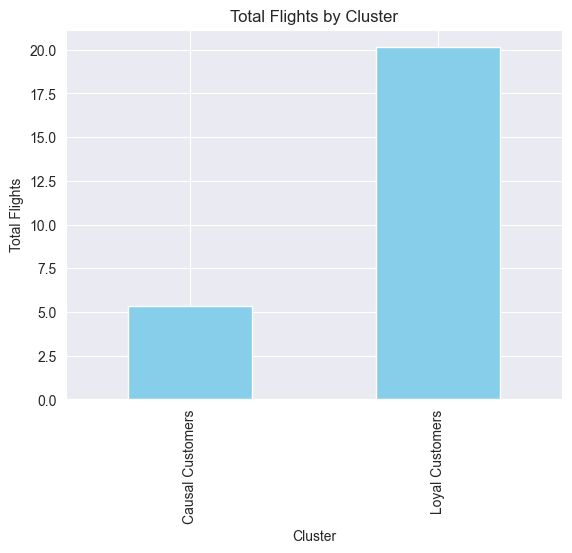

In [117]:
# plot number of flights for each cluster
cluster_flights = flight_train.groupby('cluster_label')['FLIGHT_COUNT'].mean()
cluster_flights.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Flights')
plt.title('Total Flights by Cluster')
plt.show()


In [114]:
# Apply GMM to the test data
flight_test['labels'] = gmm.predict(X_test)

# Assign the cluster labels
flight_test['cluster_label'] = flight_test['labels'].apply(lambda x: cluster_labels[x])


In [116]:
flight_test['cluster_label'].value_counts()

cluster_label
Causal Customers    7604
Loyal Customers      378
Name: count, dtype: int64

# Conclusions

In this project, we used RFM analysis and unsupervised learning techniques to segment customers based on their transaction history. We first cleaned the dataset by handling missing values and transforming the data types of the columns. We then calculated the recency, frequency, and monetary features and used KMeans and Gaussian Mixture Models for clustering. 

The KMeans model identified two customer segments: Loyal Customers and Casual Customers. Loyal Customers make more frequent purchases, and generate more revenue on average than Casual Customers. The GMM model also identified two customer segments with similar characteristics.

# Data sources:
Mohammad Aprialdi. (2020). Customer Segmentation. Kaggle. https://kaggle.com/competitions/sa-customer-segmentation